In [1]:
pip install nltk

In [2]:
import nltk

In [5]:
# nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [7]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [19]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [23]:
# Dropping the redundent looking columns
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[to_drop], axis=1)

In [32]:
df.head(2)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [33]:
# Renaming the columns 
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df.describe()

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [34]:
df.groupby('Target').describe()

Text                                                               
       count unique                                                top freq
Target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [35]:
df['Length'] = df['Text'].apply(len)

In [36]:
df.head(3)

,Target,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


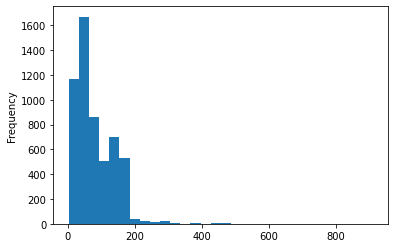

In [38]:
df['Length'].plot.hist(bins=30)

In [39]:
df['Length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Length, dtype: float64

In [40]:
df[df['Length']==910]

,Target,Text,Length
1084,ham,For me the love should start with attraction.i...,910


In [43]:
df[df['Length']==910]['Text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49c8713a50>,
      dtype=object)

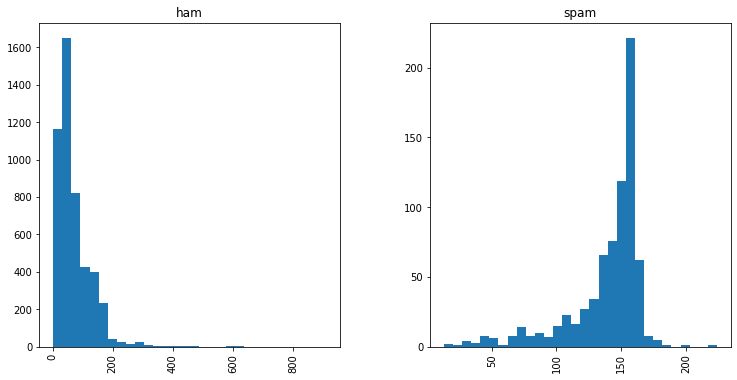

In [44]:
df.hist(column='Length',by='Target',bins=30,figsize=(12,6)) # spam messages are lengthier than ham messages.

In [45]:
import string

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
# for example
a = 'Sample message! Notice: There will be a Quiz tomorrow.'
no_punc = [i for i in a if i not in string.punctuation]

In [51]:
# no_punc

In [53]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [54]:
no_punc = ''.join(no_punc)
no_punc

'Sample message Notice There will be a Quiz tomorrow'

In [55]:
# another example
list_1 = ['a','b','c','d']
''.join(list_1)

'abcd'

In [57]:
no_punc.split()

['Sample', 'message', 'Notice', 'There', 'will', 'be', 'a', 'Quiz', 'tomorrow']

In [63]:
clean_msg = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [65]:
clean_msg

['Sample', 'message', 'Notice', 'Quiz', 'tomorrow']

In [66]:
def text_preprocess(x): # same thing done using a function
  """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words

  """

  nopunc = [char for char in x if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 

In [67]:
df.head(3)

,Target,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [68]:
df['Text'].head(4).apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
Name: Text, dtype: object

In [69]:
# stemming does a important normalization in text preprocessing, giving a simple idea for 3 different words such as Running, ran, run to Ran

## Bag of Words Model:-

1. Count how many times does a word occur in each message.(known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weight(inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length(L2 norm)

SciKit Learn's CountVectorizer() model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-D matrix, where 1-D is the entire vocabulary(1 word per row) and the other dimension are the actual documents, in this case per text message.


Note: Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this SciKit Learn will output a Sparse Matrix

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
bow_transformer = CountVectorizer(analyzer=text_preprocess).fit(df['Text'])

In [72]:
print(len(bow_transformer.vocabulary_))

11304


In [73]:
message = df['Text'][3]

In [74]:
print(message)

U dun say so early hor... U c already then say...


In [76]:
bag_of_words = bow_transformer.transform([message])
print(bag_of_words)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [77]:
print(bag_of_words.shape)

(1, 11304)


In [79]:
bow_transformer.get_feature_names()[3996] # U shows up twice

'U'

In [80]:
bow_transformer.get_feature_names()[9445]

'say'

In [81]:
msg_bow = bow_transformer.transform(df['Text'])

In [82]:
print('Shape of this Sparse Matrix: ', msg_bow.shape)

Shape of this Sparse Matrix:  (5572, 11304)


In [83]:
msg_bow.nnz # amount of non zero occurrences 

50193

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer

In [85]:
tfidf_transformer = TfidfTransformer().fit(msg_bow)

In [88]:
tfidf_ex = tfidf_transformer.transform(bag_of_words)

In [89]:
print(tfidf_ex)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [90]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']] # calculates a tf-idf for a particular word

8.527076498901426

In [91]:
messages_tfidf = tfidf_transformer.transform(msg_bow)

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
spam_detect = MultinomialNB().fit(messages_tfidf, df['Target'])

In [95]:
spam_detect.predict(tfidf_ex)[0]

'ham'

In [97]:
df['Target'][3]

'ham'

In [99]:
all_pred = spam_detect.predict(messages_tfidf)

In [101]:
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
print(confusion_matrix(df['Target'],all_pred))
print(classification_report(df['Target'],all_pred))

[[4825    0]
 [ 114  633]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [105]:
from sklearn.model_selection import train_test_split

In [106]:
msg_train,msg_test,label_train,label_test = train_test_split(df['Text'],df['Target'],test_size=0.3)

In [108]:
# msg_train

In [109]:
from sklearn.pipeline import Pipeline # alternative of above steps

In [114]:
pipeline = Pipeline([
                     
                     ('bow',CountVectorizer(analyzer=text_preprocess)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())
                     
])

In [115]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7f49c82e5dd0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [118]:
predictions = pipeline.predict(msg_test) 

In [119]:
print(confusion_matrix(label_test,predictions))
print(classification_report(label_test,predictions))

[[1447    0]
 [  75  150]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1447
        spam       1.00      0.67      0.80       225

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

